# generate a embed_task with repo 

accepting list of strings as metadata, column name is set to `string`
No embeddings found, please run `generate_embeddings_for_repo` first


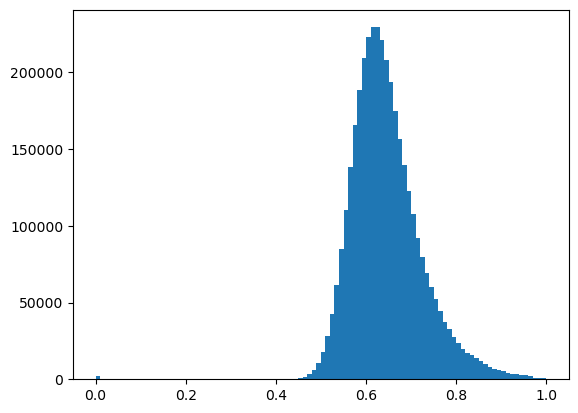

In [1]:
from embed_task import embed_task_with_repo

import pandas as pd
import random
with open('data/list.txt', 'r') as f:
    questions = f.readlines() 

trainlen = int(len(questions) * 0.8)
train = random.sample(questions, trainlen)
test = list(set(questions) - set(train))


embedder = embed_task_with_repo('bge-en', train)
embedder.load_embeddings("embeddings.npy")
# embedder.generate_embeddings_for_repo()
embedder.get_similarity_distribution(plot=True)


In [3]:
# embedder.save_embeddings("embeddings.npy")

# cluster with different method

In [4]:
# Example usage 5: Clustering
embedder.cluster(method='knn', n_clusters=50, random_state=123, colnameoflabel='test1')

df = pd.DataFrame(embedder.metadata[['string','test1']])
df.sort_values(by='test1', inplace=True)

# label the cluster with llmAPI

In [8]:
from llmAPI import GLM
import random
import json
client = GLM.myapi(temperature=0)

map = {}
clusters = embedder.metadata['test1'].unique()
for cluster in clusters:
    strings_in_groups = df[df['test1']==cluster]['string'].tolist()
    strings_in_groups = random.sample(strings_in_groups, min(5, len(strings_in_groups)))
    prompt = f"following are randomly sampled strings in a cluster by knn of embeddings: {strings_in_groups}, please label the cluster with a name no more than 10 words"
    response = client.predict(prompt)
    map[str(cluster)] = response

with open('cluster_label.json', 'w') as f:
    json.dump(map, f)

In [11]:
# Example usage 6: Assigning cluster labels to new embeddings
assigned_labels = embedder.assign_labels_to_new_embeddings(test, 'test1', method='knn')
for i in range(len(test)):
    print(test[i], assigned_labels[i])

How does hypertension contribute to Type 2 diabetes complications?
 26
What is oxytocin and what is its role in labor?
 37
What is genetic counseling?
 2
How does exercise affect the vascular function curve?
 47
What is the mechanism of action of imipramine?
 19
What are the principles of DVT prophylaxis in postoperative patients?
 12
How can the physician express commitment to learn and help despite lack of experience with a particular condition?
 5
How is atrial fibrillation related to stroke?
 47
What is the significance of the supraoptic nucleus in maintaining water balance in the body?
 17
What are possible complications of systemic lupus erythematosus?
 36
What is meningitis?
 27
What is the relationship between alcohol use disorder and suicide risk?
 22
What is the placebo effect
 19
What is the most appropriate preventive measure for this patient?
 1
From the provided data, what can be inferred about the patient's current medical condition?
 30
What is the interpretation of unc

In [12]:
# Example usage 7: Matching queries
query = random.choice(test)
matched_items = embedder.match(query, topk=2)
print(query,matched_items)

How to calculate the positive predictive value (PPV) and negative predictive value (NPV)from a given dataset?
 ['What are positive predictive value (PPV) and negative predictive value (NPV)?\n', 'What are positive predictive value and negative predictive value in epidemiology?\n']


In [14]:
queries = random.sample(test, 5)
matched_results = embedder.match(queries, threshold=0.7, return_sims=True)
for i in range(len(queries)):
    print(queries[i], matched_results[0][i], matched_results[1][i])

How does the chosen treatment potentially affect the patient’s cognition and movement disorder?
 [] []
How does antiretroviral therapy work
 ['How does Zidovudine (AZT) work to prevent HIV transmission?\n'] [0.7427412]
Why might irregular sleep patterns and issues with remembering to take regular medication affect the choice of contraception?
 ["How does the patient's lifestyle and health status affect the choice of contraceptive method?\n"] [0.7073773]
What is the most appropriate next step in diagnosis to confirm the suspected condition?
 ['Based on the biopsy result and the overall clinical condition of the patient, what should be the next step in management?\n', 'Which diagnostic test is most appropriate for confirming the diagnosis in this patient?\n', 'What is the appropriate next step in the evaluation of a patient with suspected interstitial lung disease?\n', 'Based on the symptoms and physical examination, what is the best preliminary diagnosis for the patient?\n', 'What is th